# CMSC 197 PROBLEM SET
# IMPLEMENTING LINEAR REGRESSION WITH GRADIENT DESCENT AS OPTIMIZATION FUNCTION
SUBMITTED BY: JOHN MARKTON OLARTE

In [1]:
# Import the necessary python packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# NOTE: sklearn should only be used for the following:
#     Standardization and Dividing the Data into Training and Testing Sets
#     Checking MSE and r^2 values
#     Lastly for comparison of implementation (from scratch) and the OLS results since sklearn uses least squares for linear regression.
from sklearn import preprocessing                           # Used for standardization
from sklearn.model_selection import train_test_split        # Used for dividing the dataset into training and testing sets
from sklearn.metrics import r2_score, mean_squared_error    # Used for checking MSE and r^2 values
from sklearn.linear_model import LinearRegression           # Used for the OLS results

%matplotlib inline

## DETAILS OF THIS PROBLEM SET
<br>Main Goal: Predict Sales from TV, Radio, and Newspaper Advertising Expenditures.
<br>Dataset: Advertising.csv
<br>Features (X): TV, Radio, and Newspaper
<br>Response (Y): Sales

## TO DO
Implement Linear Regression with Gradient Descent as Optimization Function:
<br>h_theta(x) = theta_0 + theta_1*x1 + theta_2*x2 + ... + theta_n*xn = theta^T * X
<br>Where, theta are the weights of the model, x are the features of the model, and
h_theta(x) is the predicted value of the response variable (y) given the features (x).

## APPLICATION

In this section we will be following the steps as indicated in the activity guide for this problem set.

### STEP 1
Load the dataset using pandas

In [2]:
# Load the data from Advertising.csv into a pandas dataframe
df = pd.read_csv('Advertising.csv')

# Dataframe Cleaning
# Since the first column is just the index, we can drop it
df = df.drop('Unnamed: 0', axis=1)
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


Visualizations of the dataset

<AxesSubplot: xlabel='Newspaper', ylabel='Sales'>

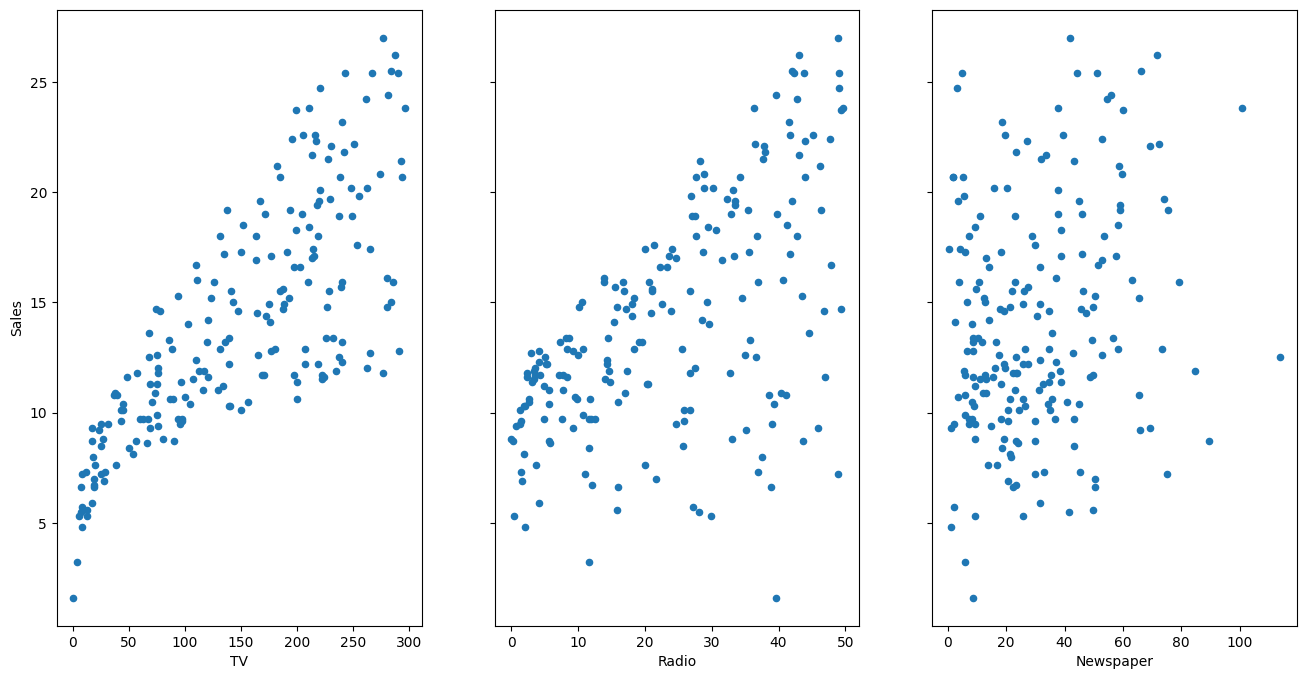

In [55]:
# Visualize the data side by side
fig, axs = plt.subplots(1, 3, sharey=True)
df.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
df.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

We can observe how scattered the points are in the NewspaperxSales plot, compared to the TVxSales and RadioxSales plots. This suggests that the newspaper might not be as a good predictor of sales as the TV and Radio. However, we will still include it in our model.

In [4]:
# Let's try to use the describe function to get some of the basic statistics about the data that we have.
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### STEP 2
Standardize each column of the dataset

In this part I will show how can we do it manually and using sklearn

In [5]:
# MANUAL STANDARDIZATION

# First we create a new dataframe that will hold the standardized values
# We will be doing this so that, we can still use the original df whenever we needed it in the suceeding parts.
df_standardized_manual = df.copy()

# TV
TV_mean = df_standardized_manual['TV'].mean()
TV_std = df_standardized_manual['TV'].std()
df_standardized_manual['TV'] = (df_standardized_manual['TV'] - TV_mean) / TV_std

# Radio
radio_mean = df_standardized_manual['Radio'].mean()
radio_std = df_standardized_manual['Radio'].std()
df_standardized_manual['Radio'] = (df_standardized_manual['Radio'] - radio_mean) / radio_std

# Newspaper
newspaper_mean = df_standardized_manual['Newspaper'].mean()
newspaper_std = df_standardized_manual['Newspaper'].std()
df_standardized_manual['Newspaper'] = (df_standardized_manual['Newspaper'] - newspaper_mean) / newspaper_std

# Sales
sales_mean = df_standardized_manual['Sales'].mean()
sales_std = df_standardized_manual['Sales'].std()
df_standardized_manual['Sales'] = (df_standardized_manual['Sales'] - sales_mean) / sales_std

df_standardized_manual

,TV,Radio,Newspaper,Sales
0,0.967425,0.979066,1.774493,1.548168
1,-1.194379,1.080097,0.667903,-0.694304
2,-1.512360,1.524637,1.779084,-0.905135
3,0.051919,1.214806,1.283185,0.858177
4,0.393196,-0.839507,1.278593,-0.215143
...,...,...,...,...
195,-1.267759,-1.317724,-0.769287,-1.230964
196,-0.615491,-1.236899,-1.031011,-0.828469
197,0.348934,-0.940539,-1.109069,-0.234310
198,1.590574,1.261955,1.636743,2.199827


In [6]:
# USING SKLEARN
# In this process, we will be using the preprocessing.scale function from sklearn
df_standardized_sklearn = preprocessing.scale(df)

# Convert the standardized data into a dataframe
df_standardized_sklearn = pd.DataFrame(df_standardized_sklearn, columns=df.columns)
df_standardized_sklearn

,TV,Radio,Newspaper,Sales
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683
...,...,...,...,...
195,-1.270941,-1.321031,-0.771217,-1.234053
196,-0.617035,-1.240003,-1.033598,-0.830548
197,0.349810,-0.942899,-1.111852,-0.234898
198,1.594565,1.265121,1.640850,2.205347


In [7]:
# FOR CHECKING
# Just to check if the manual standardization and the sklearn standardization are the same
#  We can do this by subtracting the two dataframes
df_standardized_manual - df_standardized_sklearn

,TV,Radio,Newspaper,Sales
0,-0.002428,-0.002457,-0.004453,-0.003885
1,0.002997,-0.002710,-0.001676,0.001742
2,0.003795,-0.003826,-0.004464,0.002271
3,-0.000130,-0.003048,-0.003220,-0.002154
4,-0.000987,0.002107,-0.003209,0.000540
...,...,...,...,...
195,0.003181,0.003307,0.001930,0.003089
196,0.001545,0.003104,0.002587,0.002079
197,-0.000876,0.002360,0.002783,0.000588
198,-0.003991,-0.003167,-0.004107,-0.005520


From the above results we can see that our manual standardization is almost the same as the one from sklearn, the slight difference might be due to the small variation in the calculation of the mean and standard deviation of the dataset using the two methods.

In [8]:
# Moving forward, we will be using the standardized data from sklearn
df_standardized = df_standardized_sklearn
df_standardized

,TV,Radio,Newspaper,Sales
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683
...,...,...,...,...
195,-1.270941,-1.321031,-0.771217,-1.234053
196,-0.617035,-1.240003,-1.033598,-0.830548
197,0.349810,-0.942899,-1.111852,-0.234898
198,1.594565,1.265121,1.640850,2.205347


### STEP 3
Add a new column to the dataset with a value of 1 for each row

In [9]:
# We need to add this column as it will serve as our bias term.
# Basically, in the formula y = theta_0 + theta_1 * x_1 + theta_2 * x_2 + ... + theta_n * x_n
#   The theta_0 is the bias term and for us to include it in the computation we need to add a column of 1's.
#   theta_0 * 1 = theta_0 (by Identity Property of Multiplication)
df_standardized.insert(0, 'all_ones', 1)
df_standardized

,all_ones,TV,Radio,Newspaper,Sales
0,1,0.969852,0.981522,1.778945,1.552053
1,1,-1.197376,1.082808,0.669579,-0.696046
2,1,-1.516155,1.528463,1.783549,-0.907406
3,1,0.052050,1.217855,1.286405,0.860330
4,1,0.394182,-0.841614,1.281802,-0.215683
...,...,...,...,...,...
195,1,-1.270941,-1.321031,-0.771217,-1.234053
196,1,-0.617035,-1.240003,-1.033598,-0.830548
197,1,0.349810,-0.942899,-1.111852,-0.234898
198,1,1.594565,1.265121,1.640850,2.205347


### STEP 4
Divide the dataset into training and testing sets

In [10]:
# Feature Selection: TV, Radio, Newspaper, and all_ones (bias term)
features = df_standardized[['all_ones', 'TV', 'Radio', 'Newspaper']]
# Select the Sales column as the target (response) variable
response = df_standardized['Sales']

# We will be using 75% of the data for training and 25% for testing
X_train, X_test, y_train, y_test = train_test_split(features, response, train_size=0.75, test_size=0.25)

### STEP 5
Fit the model on the training set.

#### CREATE THE REQUIRED FUNCTIONS

##### 1. DEFINE A FUNCTION TO INITIALIZE WEIGHTS
This function will intitialize the weights of the model to 0 (if random=False), or to random values (if random=True)

In [11]:
def initialize_weights(X, random=False):
    # Initialize the length of the weights to the number of columns in X
    len_X = X.shape[1]
    
    # If the random parameter is set to True, then we will initialize the weights randomly
    if random:
        return np.random.rand(len_X)
    # Otherwise, by default, we will initialize the weights to zero
    return np.zeros(len_X)

Testing the function: initialize_weights()

In [12]:
# Initialize the weights (Randomly)
weights = initialize_weights(X_train, random=True)
weights

array([0.24625288, 0.21701476, 0.08003411, 0.18137031])

In [13]:
# Initialize the weights (Zeros)
weights = initialize_weights(X_train)
weights

array([0., 0., 0., 0.])

##### 2. DEFINE A FUNCTION THAT RETURNS THE PREDICTED Y (Y_HAT)
Returns a vector of the predicted values of y_hat

In [14]:
def predict(X, weights):
    # From the formula we need to multiply each weight to its corresponding feature from X
    #   we can do this using the dot product function from numpy.
    y_hat = np.dot(X, weights)

    return y_hat

In [15]:
# Predict the values of the training set, using a random set of weights
# NOTE: We will be using X_train since we want to predict the values of the training set.
y_hat_train = predict(X_train, initialize_weights(X_train, random=True))

# We can compare the predicted values to the actual values by creating a new dataframe.
df_train = pd.DataFrame({'Actual': y_train, 'Predicted': y_hat_train})
df_train

,Actual,Predicted
84,1.475195,1.812563
95,0.552898,1.410020
91,-1.291696,-0.051411
42,1.283050,0.963529
89,0.514469,2.112353
...,...,...
118,0.360753,1.789122
182,-1.022693,0.119147
39,1.436766,1.569455
107,-1.022693,-0.152652


As we can see the predicted values and actual values sometimes are close and sometimes are far from each other. This suggests to us that our model is not yet accurate.
Hence in this activity we will try to improve the accuracy of our model by using gradient descent algorithm.

##### 3. DEFINE A FUNCTION TO COMPUTE FOR THE COST
Returns a scalar value that tells use how accurate the model is

<br>cost = J_theta = 1/2m * sum(h0(x) - y)^2
<br>where m is the length of the dataset
<br>h0(x) is the predicted value of y (a.k.a the y_hat)
<br>and y is the actual value of y

In [16]:
def compute_cost(X, y, weights):  
    # Initialize the length of the data
    # The length of the data is equal to the length of either the response or the features
    # For simplicity, we will use the length of the response
    m = len(y)

    # Calculate the cost function
    # From the formula, we need to square the difference between the predicted and actual values and find their sum
    #   as indicated by this formula [sum((y_hat - y)^2)]
    #   and then we need to multiply it by 1/2m.
    cost = 1/(2*m) * np.sum((predict(X, weights) - y)**2)
    
    return cost

In [17]:
# Let us try to check the cost function of the training set, using a random set of weights
test_cost = compute_cost(X_train, y_train, initialize_weights(X_train, random=True))
print(f"TEST COST: {test_cost}")

TEST COST: 0.972246596172591


NOTE: that this is not the cost from the previous test we had in the predict function, as we have reinitialized the weights in this case. Hence, the cost will be different.

<br>In this case, we can see that the cost is 0.972247 which tells us that our model is not yet accurate.

##### 4. DEFINE A FUNCTION TO COMPUTE THE GRADIENT
<br>This function returns a matrix (w) that represents the partial derivative of the cost function J(theta_0, theta_1) with respect to each parameter theta_j.

<br>w = 1/m * sum(y_hat - y) * x_j

<br>where w is is an array with sa shape of len(feautures) + 1,
<br>y_hat is the predicted value of y,
<br>y is the actual value of y,
<br>and x_j is the jth feature of the dataset

<br> NOTE: in the given activity guide the w is multiplied by alpha, but in my case I have utilized the partial derivative of the cost function as indicated in this deriviation: <a href="https://rpubs.com/dnuttle/ml-linear-cost-func-derivative"> PARTIAL DERIVIATION OF THE COST FUNCTION </a>. This is because I will be using the alpha value later in the update_weights function. If I use the alpha value here, then the learning rate will be too small, since the alpha value will be squared (This is a problem, as later on we would find a very important relationship between the learning rate and the cost function).

In [18]:
def compute_gradient(X, y, weights):
    # Initialize the length of the data
    m = len(y)
    
    # X.T is the transpose of X which we will apply to each difference between the predicted and actual values using the dot product.
    w = 1/m * np.dot(X.T, (predict(X, weights) - y))

    return w

##### 5. DEFINE A FUNCTION TO UPDATE THE WEIGHTS BASED ON THE GRADIENT FOR THE SPECIFIC ITERATION
This function will update the weights for that certain iteration

In [19]:
def update_weights(X, y, weights, alpha):
    # Update the weights: theta = theta - alpha * gradient
    #   As mentioned from my notes in compute_gradient, we need to multiply alpha (learning rate) to the gradient
    #   and then subtract it from the weights.
    updated_weights = weights - alpha * compute_gradient(X, y, weights)

    return updated_weights

##### 6. DEFINE A FUNCTION THAT WILL RUN THE GRADIENT DESCENT ALGORITHM
This function will return 2 matrices
1. Matrix for the weights per iteration
2. Matrix fo the costs for each iteration

In [20]:
def gradient_descent(X, y, weights, alpha, iterations):
    # Since we are to produce 2 matrices, we first initialize these two matrices
    weights_history = [0] * iterations
    cost_history = [0] * iterations

    # Loop through the number of iterations
    # NOTE: There are actually two main types of gradient descent, batch gradient descent and stochastic gradient descent.
    #      In our case, we are implementing the batch gradient descent. That is why we are looping through the entire dataset.
    #      If we were to implement the stochastic gradient descent, we would only need to loop through a single data point.
    for i in range(iterations):
        # Update the weights
        weights = update_weights(X, y, weights, alpha)
        # Save the weights in the weights history matrix
        weights_history[i] = weights
        # Compute the cost
        cost = compute_cost(X, y, weights)
        # Save the cost in the cost history matrix
        cost_history[i] = cost
    
    return weights_history, cost_history

##### 7. DEFINE A FUNCTION THAT WILL PLOT THE COSTS FOR EACH ITERATIONS

In [21]:
def plot_costs(cost_array):
    # Set the size of the plot
    plt.figure(figsize=(10, 6))
    plt.plot(cost_array)
    plt.title('Cost over Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.show()

##### 8. PREDICT Y FOR TRAIN SET AND CALCULATE THE COST

In [22]:
# Predict y_hat using the train set
weights = initialize_weights(X_train, random=True)
y_hat_train = predict(X_train, weights)
y_hat_train_df = pd.DataFrame({'Actual': y_train, 'Predicted': y_hat_train})
y_hat_train_df

,Actual,Predicted
84,1.475195,1.847445
95,0.552898,1.285632
91,-1.291696,-0.616968
42,1.283050,2.169708
89,0.514469,1.041712
...,...,...
118,0.360753,1.166517
182,-1.022693,-0.302175
39,1.436766,1.885689
107,-1.022693,-0.104846


As we can see from the dataframe above, the predicted values is not that accurate, hence we can assume that the cost is high.
Let's try to see it by calculating for the cost below!

In [23]:
# Calculate the cost of the predicted values
train_cost = compute_cost(X_train, y_train, weights)
train_cost

0.4446371897661143

Using the weights from the last iteration, we can see that the cost is 0.4446 which suggests that the model's prediction is somehow good but it could be better (we wanted it to be closer to zero). In fact, we already observed it from the dataframe above.

##### 9. PREDICT Y FOR TEST SET AND CALCULATE THE COST

In [24]:
# Predict y_hat using the test set
weights = initialize_weights(X_test, random=True)
y_hat_test = predict(X_test, weights)
y_hat_test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_hat_test})
y_hat_test_df['Residual'] = y_hat_test_df['Actual'] - y_hat_test_df['Predicted']
y_hat_test_df

,Actual,Predicted,Residual
183,2.339849,2.840596,-0.500748
14,0.956403,1.656985,-0.700582
41,0.591327,1.502771,-0.911444
37,0.130178,2.410478,-2.280300
128,2.051631,1.676802,0.374828
40,0.495254,0.774812,-0.279558
179,-0.273327,-0.232869,-0.040457
32,-0.849762,-0.522237,-0.327526
190,-0.619188,1.089736,-1.708924
22,-1.618343,0.578622,-2.196965


As we can see from the dataframe above, the predicted values is not that accurate, hence we can assume that the cost is high.
Let's try to see it by calculating for the cost below!

In [25]:
# Calculate the cost of the predicted values
test_cost = compute_cost(X_test, y_test, weights)
test_cost

0.5051963393396265

The cost is really not that good at 0.5052, this shows the limitation with this approach. Later on will be opimizing it using the gradient descent algorithm.

### STEP 6
Predict the quantitative response y on the training set. Evaluate the model using the MSE cost function defined for the gradient descent.

In [26]:
# TRAINING THE MODEL

# Initialize the weights
weights = initialize_weights(X_train, random=True)

# Set the iterations and the learning rate
iterations = 10000                          # Let's do 10,000 iterations for now
alpha = 0.01

# Run the gradient descent algorithm (Training)
weights_history_train, cost_history_train = gradient_descent(X_train, y_train, weights, alpha, iterations)
# Run the gradient descent algorithm (Test)
weights_history_test, cost_history_test = gradient_descent(X_test, y_test, weights, alpha, iterations)

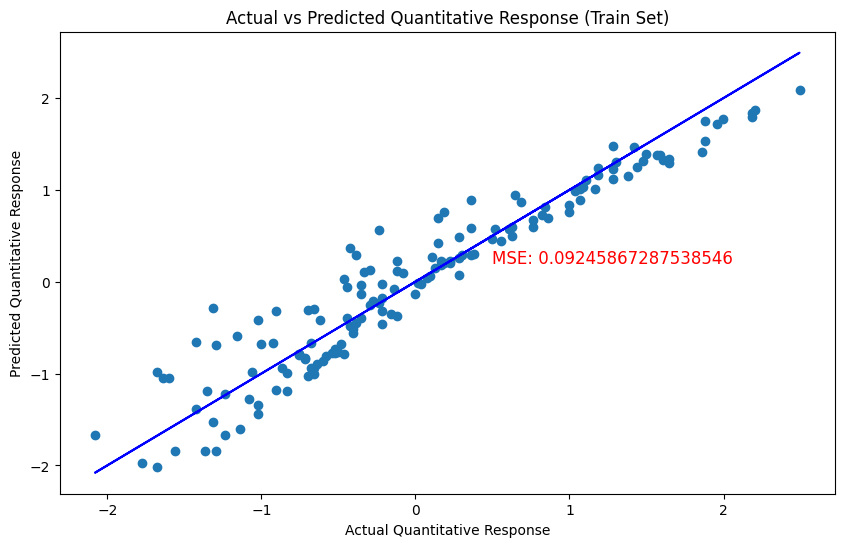

In [27]:
# USING THE TRAINED MODEL TO PREDICT VALUES FROM THE TRAINING DATASET

# Predict the quantitative response using the train set
y_hat_train = predict(X_train, weights_history_train[-1])

# Plot the quantitative response of y
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_hat_train)
plt.title('Actual vs Predicted Quantitative Response (Train Set)')
plt.xlabel('Actual Quantitative Response')
plt.ylabel('Predicted Quantitative Response')
# MSE
plt.text(0.5, 0.20, f"MSE: {mean_squared_error(y_train, y_hat_train)}", color='red', fontsize=12)
# Best Fit Line
plt.plot(y_train, y_train, color='blue')
plt.show()

Evalution of the MSE (Training Set): 
<br>The MSE is calculated to be 0.092459. It is said that the closer the value of MSE to zero, means the model is more accurate. But there is still a lot of improvement that could be made, moreover I believe that this is because we have included the newspaper as a feature in our model. Remember that from our observation NewspaperxSales plot, we saw that the points are scattered and not as linear as the TVxSales and RadioxSales plots. Hence, we assumed that the newspaper is not a good predictor of sales.

<br>In that case, we can say that our model is accurate enough to a certain degree.
We cannot really say if this is good enough already or maybe there is a model that still exist which have lower MSE value than we currently have. But for our use case this is good enough.

### STEP 7
Predict the quantitative response y on the testing set. Evaluate the model using the MSE cost function defined for the gradient descent.

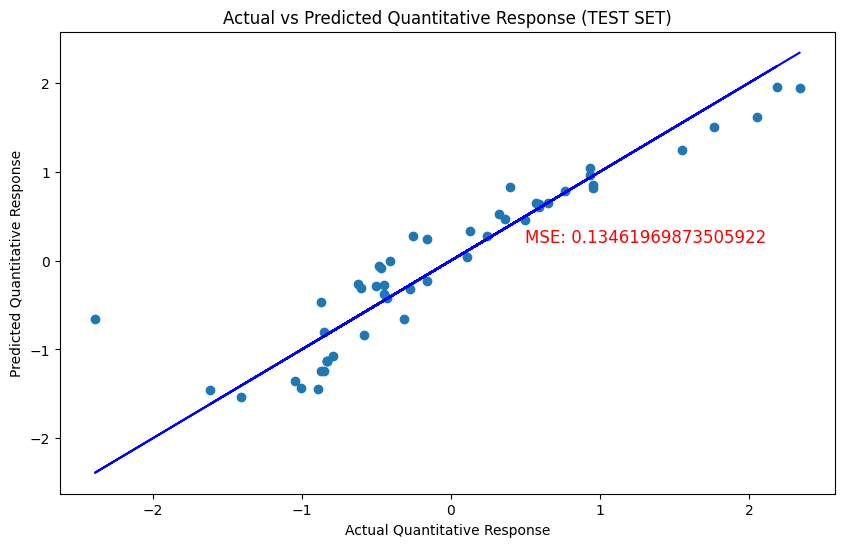

In [28]:
# USING THE TRAINED MODEL TO PREDICT VALUES FROM THE TEST DATASET

# Predict the quantitative response using the test set
y_hat_test = predict(X_test, weights_history_train[-1])

# Plot the quantitative response of y
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_hat_test)
plt.title('Actual vs Predicted Quantitative Response (TEST SET)')
plt.xlabel('Actual Quantitative Response')
plt.ylabel('Predicted Quantitative Response')
# MSE
plt.text(0.5, 0.20, f"MSE: {mean_squared_error(y_test, y_hat_test)}", color='red', fontsize=12)
# Best Fit Line
plt.plot(y_test, y_test, color='blue')
plt.show()

Evalution of the MSE (Test Set): 
The MSE is calculated to be 0.13162. This is an interesting MSE as it tells us that our model which was trained using the training set is able to predict the test set with a good accuracy. However, the MSE in the test dataset is not better than the MSE in our train dataset. Since, MSE(train) < MSE(test).

### STEP 8
Let us use the model to predict the sales on the actual dataset.

In [29]:
df_standardized

# Add the Predicted Sales column to the dataframe
df_standardized['Predicted Sales'] = predict(df_standardized[['all_ones', 'TV', 'Radio', 'Newspaper']], weights_history_train[-1])


# Convert the standardized residuals back to the original scale (for all columns)
df_standardized['TV'] = df_standardized['TV'] * df['TV'].std() + df['TV'].mean()
df_standardized['Radio'] = df_standardized['Radio'] * df['Radio'].std() + df['Radio'].mean()
df_standardized['Newspaper'] = df_standardized['Newspaper'] * df['Newspaper'].std() + df['Newspaper'].mean()
df_standardized['Sales'] = df_standardized['Sales'] * df['Sales'].std() + df['Sales'].mean()
df_standardized['Predicted Sales'] = df_standardized['Predicted Sales'] * df['Sales'].std() + df['Sales'].mean()

# Calculate the Residuals
df_standardized['Residuals'] = df_standardized['Sales'] - df_standardized['Predicted Sales']

# Drop the all_ones column
df_standardized.drop('all_ones', axis=1, inplace=True)

df_standardized

,TV,Radio,Newspaper,Sales,Predicted Sales,Residuals
0,230.308426,37.836477,69.296979,22.120270,20.526917,1.593353
1,44.242678,39.340241,45.136502,10.390910,12.403403,-2.012493
2,16.874171,45.956803,69.397230,9.288149,12.346650,-3.058501
3,151.511186,41.345260,58.570128,18.511236,17.643578,0.867658
4,180.884712,10.768723,58.469877,12.897183,13.075204,-0.178020
...,...,...,...,...,...,...
195,37.926869,3.650906,13.757957,7.583883,5.326756,2.257128
196,94.067396,4.853917,8.043654,9.689153,8.143929,1.545224
197,177.075176,9.264959,6.339388,12.796932,12.794362,0.002570
198,283.942679,42.047016,66.289451,25.528802,23.801419,1.727383


We can see that the residual values are not that far from each other. Hence, we can say that our model is accurate enough.

### STEP 9
Observe the cost results and analyze.

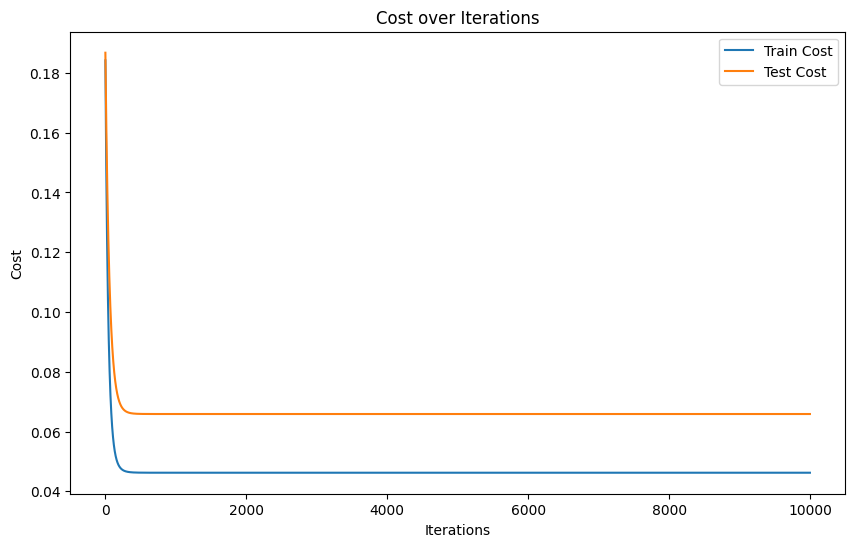

In [30]:
# For us to observe the cost reslts, we can simply plot the cost over iterations
plt.figure(figsize=(10, 6))
plt.plot(cost_history_train, label='Train Cost')
plt.plot(cost_history_test, label='Test Cost')
plt.title('Cost over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()

ANALYSIS: As we can observe from the plot, as we get more and more iteration the cost function value decreases. Which suggests that our model is getting more accurate as we get more and more iterations.

<br> We can also observe a gradual descent of the cost value, hence the reason why it is called gradient descent.

## QUESTIONS / EXPLORATION
In this part, I will be answering the given questions from the activity guide. As well as I will try to explore more based on the questions that were given.

### QUESTION 1
What are the optimal weights found by your implemented gradient descent? Plug it into the linear model:
h0(x) = theta0 + theta1*TV + theta2*Radio + theta3*Newspaper

What are your interpretations regarding the formed linear model?

In [31]:
# Find the optimal weights using the training set

init_w = initialize_weights(X_train) # We will use the zeros weights as our initial weights

# Set the iterations and the learning rate
iterations = 50000                          # Let's do 50,000 iterations, as recommended in the activity guide.
alpha = 0.01                                # Let's use a learning rate of 0.01

# Run the gradient descent algorithm
weights_history, cost_history = gradient_descent(X_train, y_train, init_w, alpha, iterations)

# Get the final weights (Optimal weights)
# We will assume that the optimal weights are the weights that give us the lowest cost, 
#   which can be found at the end of the weights_history array.
optimal_weights = weights_history[-1]

# Print the optimal weights
print(f"Optimal Weights: {optimal_weights}")
# Print the linear regression equation
print(f"Linear Regression Equation: y = {optimal_weights[0]} + {optimal_weights[1]}*TV + {optimal_weights[2]}*Radio + {optimal_weights[3]}*Newspaper")

Optimal Weights: [ 0.00395211  0.75166608  0.55006003 -0.01472172]
Linear Regression Equation: y = 0.0039521058743717296 + 0.7516660788779896*TV + 0.5500600255090007*Radio + -0.014721717481383801*Newspaper


Interpreations regarding the formed linear model:
1. The bias term is 0.0039521058743717296, which is a value that we subtract in our model to help it to be more accurate.
2. The weight for TV is 0.7516660788779896, which tells us that for every 1 unit increase in TV, the sales will increase by 0.7516660788779896 units. We can also see that this is the highest weight among the 3 features in our model, which suggests that TV is the best predictor of sales and that the Sales is highly impacted by TV advertising.
3. The weight for Radio is 0.5500600255090007, which tells us that for every 1 unit increase in Radio, the sales will increase by 0.5500600255090007 units. This is the second highest weight among the 3 features in our model, which suggests that Radio is the second-best predictor of sales and that the Sales is highly impacted by Radio advertising.
4. The weight for Newspaper is -0.014721717481383801, which tells us that for every 1 unit increase in Newspaper, the sales will only increase by -0.014721717481383801 units. This is the lowest weight among the 3 features in our model, which suggests that Newspaper is the least predictor of sales and that the Sales is not heavily impacted by Newspaper advertising. This comes to no surprise to us as we already observed it in the NewspaperxSales plot. From its negative value, we can also say that the Sales is negatively impacted by Newspaper advertising.
5. From our findings from 2-4, we can say that to improve the Sales, we can focus more of the budget to the TV and Radio advertising. Moreover, we can also suggest reducing the budget to the Newspaper advertising and move those funds as additional budget to the TV and Radio advertising. Whereas TV advertising should be the focus of the budget.

### QUESTION 2
Provide a scatter plot of the actual vs. predicted values for both train and test set.

Is there a trend?

Provide an r^2 score

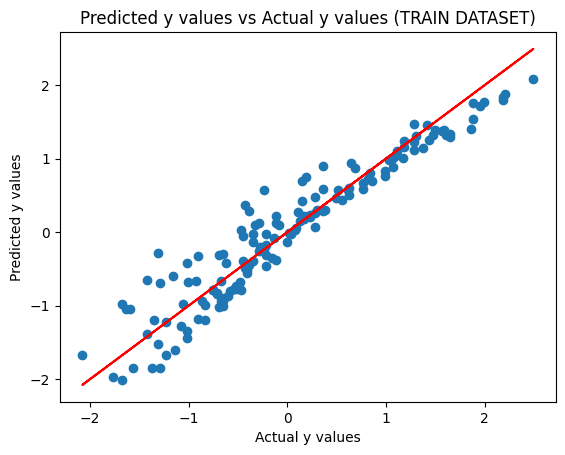

In [32]:
# Scatter plot of the actual y values against the predicted y values (training set)
pred_train = predict(X_train, optimal_weights)
plt.scatter(y_train, pred_train)
plt.title('Predicted y values vs Actual y values (TRAIN DATASET)')
plt.xlabel('Actual y values')
plt.ylabel('Predicted y values')
plt.plot(y_train, y_train, color='red')
plt.show()

Trend remarks: We can see an upward trend in the actual vs. predicted values for both train and test set. This suggests that the features that we have chosen are good predictors of the Sales.

<br> We can also observe that the points in the scatter plot are near the line of best fit, which suggests that our model is accurate enough. Except for that one outlier we can observe at (~-0.9, ~-2.9)

In [33]:
# r2 score of the training set
print(f"r2 score: {r2_score(y_train, pred_train)}")

r2 score: 0.9087511585908064


Interpretation of r^2 score: The r^2 score 0.9088 means that 90.88% of the variance in the response variable is explained by the model. This means that our model is 90.88% accurate in predicting the sales.

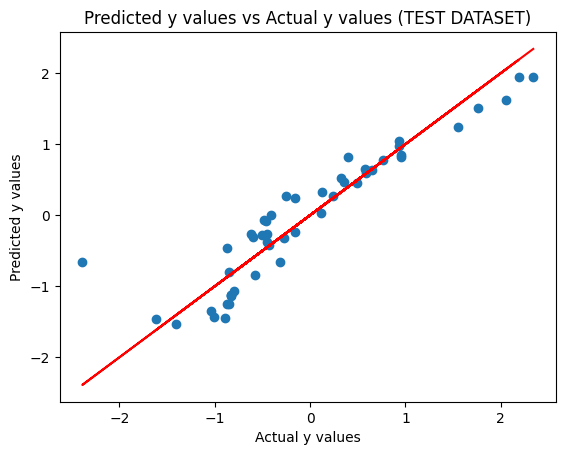

In [34]:
# Scatter plot of the actual y values against the predicted y values (test set)
pred_test = predict(X_test, optimal_weights)
plt.scatter(y_test, pred_test)
plt.title('Predicted y values vs Actual y values (TEST DATASET)')
plt.xlabel('Actual y values')
plt.ylabel('Predicted y values')
plt.plot(y_test, y_test, color='red')
plt.show()

Trend remarks: We can see an upward trend in the actual vs. predicted values for both train and test set. This suggests that the features that we have chosen are good predictors of the Sales.

In [35]:
# r2 score of the test set
print(f"r2 score: {r2_score(y_test, pred_test)}")

r2 score: 0.859393869585646


Interpretation of r^2 score: The r^2 score 0.8594 means that 85.94% of the variance in the response variable is explained by the model. This means that our model is 85.94% accurate in predicting the sales.

<br> Moreover, this means that our trained model is less accurate than we have hoped for in the data that is not part of its training. If you could remember MSE(train) < MSE(test), hence this is as expected.

<br> I could recommend to rerun the creation of the model, until we get a model that is more accurate in predicting the test set. But for now, this is good enough for our use case as we have already achieved a good accuracy in predicting the sales.

### QUESTION 3
What happend to the error, r2, and cost as the number of iterations increases?

In [36]:
# Let's calculate the MSE for each iterations using sklearn
MSE_array = []
for i in range(iterations):
    MSE = mean_squared_error(y_train, predict(X_train, weights_history[i]))
    MSE_array.append(MSE)

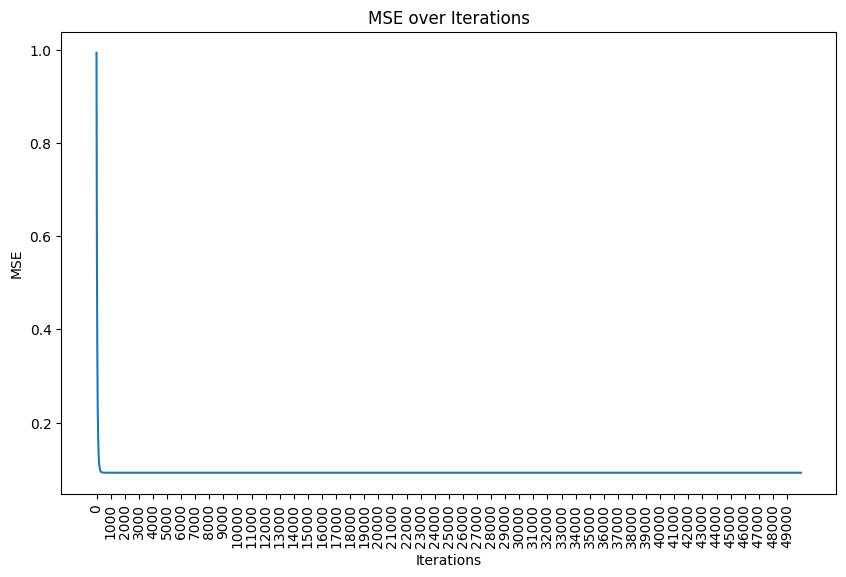

In [37]:
# Plot the MSE over iterations
plt.figure(figsize=(10, 6))
plt.plot(MSE_array)
plt.title('MSE over Iterations')
plt.xlabel('Iterations')
plt.xticks(np.arange(0, iterations, 1000), rotation=90)
plt.ylabel('MSE')
plt.show()

As we can observed on the figure above, as the number of iterations the mean square error decreases.
Also we can see it plateauing even before reaching 1000 iterations. This means that at that at a particular point, the model is already accurate enough to predict the sales.

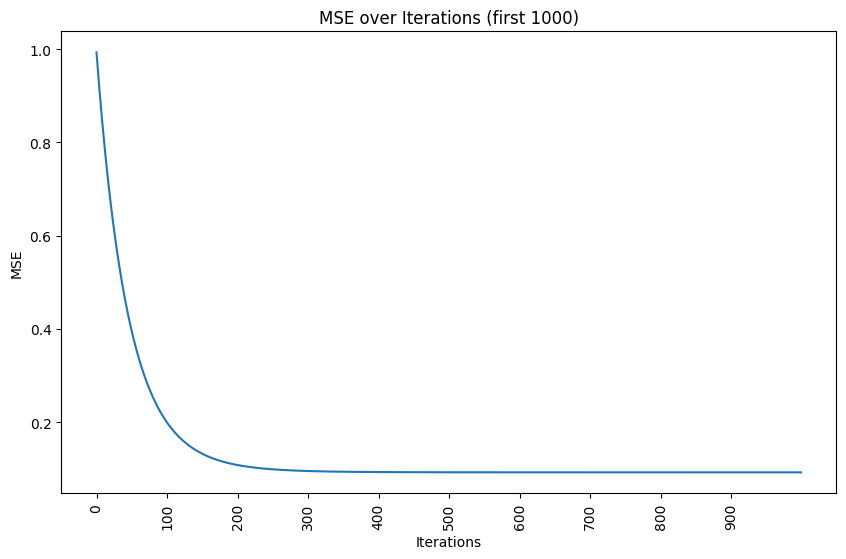

In [38]:
# Let's try to zoom in to the plot, so we could see the gradient descent more clearly
plt.figure(figsize=(10, 6))
plt.plot(MSE_array[0:1000])
plt.title('MSE over Iterations (first 1000)')
plt.xlabel('Iterations')
plt.xticks(np.arange(0, 1000, 100), rotation=90)
plt.ylabel('MSE')
plt.show()

Now it becomes clear that around 400 iterations is enough to predict the sales. In the particular dataset we have.

Note that 400 iterations may not be the actual optimal number of iterations, we can calculate this later using the r^2 score. The number is based purely on the observation on the given plot above.

In [39]:
# Let's calculate for the r^2 score for each iterations
r2_array = []
for i in range(iterations):
    r2 = r2_score(y_train, predict(X_train, weights_history[i]))
    r2_array.append(r2)

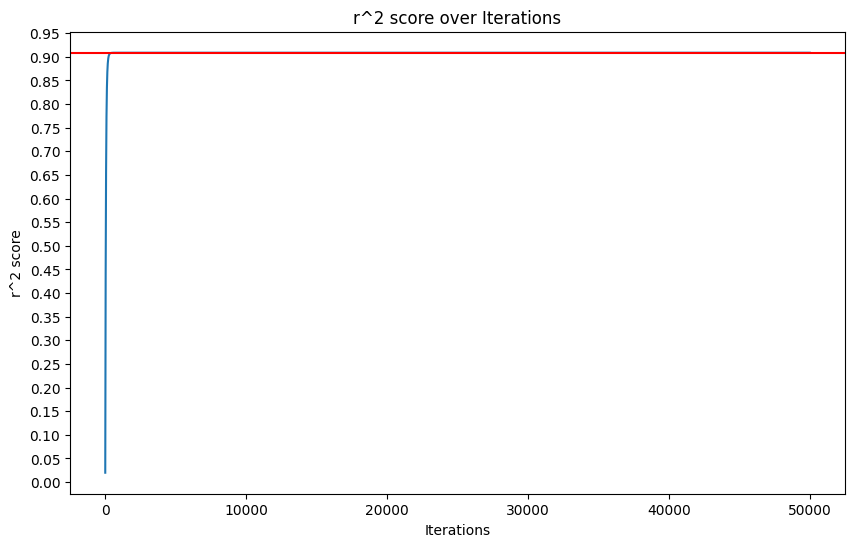

Maximum r^2 score: 0.9087511585908064


In [40]:
# Plot the r^2 score over iterations
plt.figure(figsize=(10, 6))
plt.plot(r2_array)
plt.title('r^2 score over Iterations')
plt.xlabel('Iterations')
plt.ylabel('r^2 score')
plt.yticks(np.arange(0, 1, 0.05))
# We can also mark the maximum r^2 score
plt.axhline(y=max(r2_array), color='r', linestyle='-')
plt.show()


# Print the maximum r^2 score
print(f"Maximum r^2 score: {max(r2_array)}")

Wow! The figure from the above cell shows an intersting pattern, as it is the exact reverse of the MSE figure. This means that as the error decreases, the r^2 score increases.
Which means that the model is more accurate as the error decreases.

We can also see that it is only accurate enough to a certain percentage, which is the maximum r^2 score of 0.9088 or 90.88% accurate.

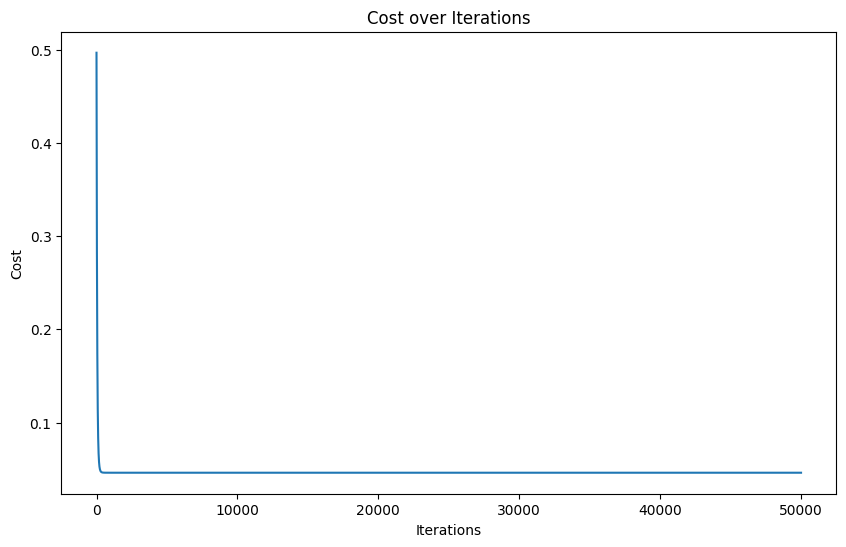

In [41]:
# Finally, let's plot the cost over iterations
plot_costs(cost_history)

Well the figure for cost over iterations is the same as with out MSE over iterations plot. Hence we can say that as our error decreases, our cost decreases as well.

Which means that as we get more accurate (as we saw in r^2 over iterations plot), our cost decreases.

#### SUMMARY OF RELATIONSHIP BETWEEN ERROR, R^2, COST, AND NUMBER OF ITERATIONS
1. As the number of iterations increases, the error decreases.
2. As the number of iterations increases, the r^2 score increases.
3. As the number of iterations increases, the cost decreases. 
4. As the error / cost decreases, the r^2 score increases, and vice versa.
5. As the error decreases, the cost decreases, and vice versa.

In [42]:
# Before we proceed to the next question, let us identify the optimal number of iterations in this dataset.

# Let's create a function to find the optimal number of iterations
# This function will simply return the number of iterations that gives the maximum r^2 score
def optimal_iterations(max_r2, r2_array):
    for i in range(len(r2_array)):
        if r2_array[i] == max_r2:
            return i

In [43]:
optimal_iterations = optimal_iterations(max(r2_array), r2_array)
print(f"Optimal number of iterations: {optimal_iterations}")

Optimal number of iterations: 2850


In [44]:
# Let's check the cost at the optimal number of iterations
print(f"Cost at the optimal number of iterations: {cost_history[optimal_iterations]}")
# Also the weights at the optimal number of iterations
print(f"Weights at the optimal number of iterations: {weights_history[optimal_iterations]}")

# Let's compare it at the last iteration
print(f"\n\nCost at the last iteration: {cost_history[-1]}")
print(f"Weights at the last iteration: {weights_history[-1]}")

Cost at the optimal number of iterations: 0.04622933643769276
Weights at the optimal number of iterations: [ 0.00395211  0.75166608  0.55006002 -0.01472171]


Cost at the last iteration: 0.04622933643769274
Weights at the last iteration: [ 0.00395211  0.75166608  0.55006003 -0.01472172]


As we can see there's no actual significant difference between the r^2 score and cost at the optimal number of iterations (2850) and the number of iterations that we have chosen (50,000).

Which means we have wasted a lot of time and resources indoing the gradient descent for 50,000 iterations. As there no more greater improvement that is happening to the accuracy of the model at a certain point within the 50,000 iterations.

We can improve this by redefining our gradient descent function to stop when the cost score reaches a certain difference threshold.
The difference threshold can be set to the difference between the cost score of the current iteration and the cost score of the previous iteration.
If the difference is less than the threshold, then we can stop the gradient descent.

For example the difference between the cost score of the current iteration and the cost score of the previous iteration is less than 1.0x10^(-15), then we can stop the gradient descent.

In [45]:
# Implementation of Gradient Descent Algorithm with Difference Threshold
def gradient_descent_optimized(X, y, weights, alpha, iterations, diff_threshold):
    # Since we are to produce 2 matrices, we first initialize these two matrices
    weights_history = []
    cost_history = []
    last_iteration = 0

    # Loop through the number of iterations
    for i in range(iterations):
        # Update the weights
        weights = update_weights(X, y, weights, alpha)
        # Save the weights in the weights history matrix
        weights_history.append(weights)
        # Compute the cost
        cost = compute_cost(X, y, weights)
        # Save the cost in the cost history matrix
        cost_history.append(cost)

        # Check if the difference between the current cost and the previous cost is less than the threshold
        if i > 0 and abs(cost_history[i] - cost_history[i-1]) < diff_threshold:
            last_iteration = i
            # If yes, then we will break out of the loop
            break
        last_iteration = i
    
    # In this function, we will also return the last iteration to indicate to indicate the possibly optimal number of iterations.
    return weights_history, cost_history, last_iteration

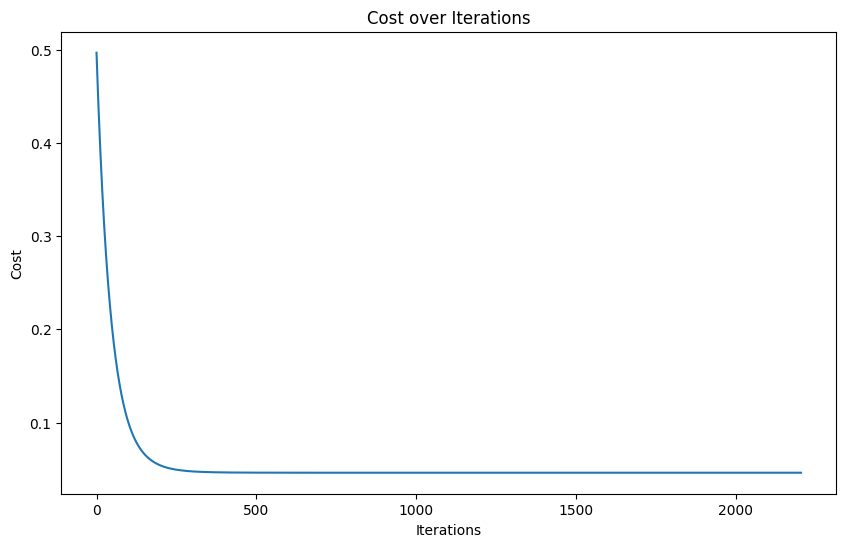

In [46]:
# Let's try the optimized gradient descent algorithm we made

# Set the target iterations and the learning rate
iterations = 50000
alpha = 0.01

# Set the difference threshold
diff_threshold = 1.0e-15

# Run the optimized gradient descent algorithm
weights_history, cost_history, optimal_iterations = gradient_descent_optimized(X_train, y_train, init_w, alpha, iterations, diff_threshold)

# plot the cost over iterations
plot_costs(cost_history)

### QUESTION 4 and 5

Once you determine the optimal number of iterations, check the effect on the cost and error as you change the learning rate.

Is there a relationship on the learning rate and the number of iterations?

In [47]:
init_w = initialize_weights(X_train)

# For this will use the optimal iterations based on the previous question.
iterations = optimal_iterations

# Let us define a list of learning rate that we will be using for us to answer the fourth question effectively.
learning_rates = [0.6, 0.5, 0.3, 0.2, 0.1, 0.01, 0.001, 0.0001, 0.00001]

# Store the values of the cost and error in the following dictionary
cost_dict = {i:0 for i in learning_rates}
error_dict = {i:0 for i in learning_rates}
cost_history_dict = {i:[] for i in learning_rates}

# Loop through the learning rates
for alpha in learning_rates:
    # Run the gradient descent algorithm
    weights_history, cost_history = gradient_descent(X_train, y_train, init_w, alpha, iterations)

    # UPDATE THE DICTIONARIES
    # Get the final weights (Optimal weights)
    cost_dict[alpha] = cost_history[-1]
    # Calculate for the MSE
    from sklearn.metrics import mean_squared_error
    error_dict[alpha] = mean_squared_error(y_train, predict(X_train, weights_history[-1]))
    # Save the cost history
    cost_history_dict[alpha] = cost_history

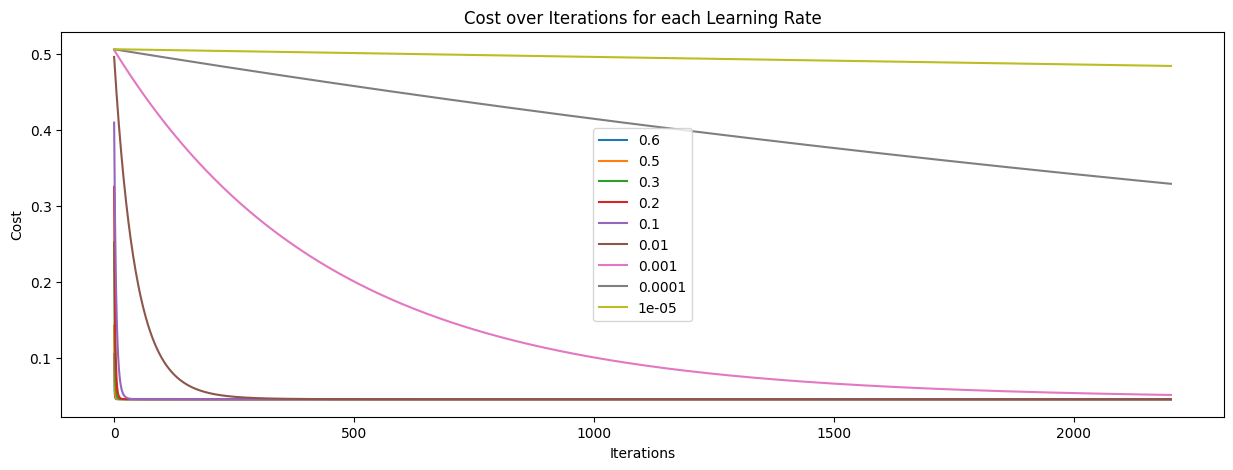

In [48]:
# Plot the cost over iterations for each learning rate (in the same plot)
plt.figure(figsize=(15, 5))
for alpha in learning_rates:
    plt.plot(cost_history_dict[alpha], label=alpha)
plt.title('Cost over Iterations for each Learning Rate')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()

From the plot above, we can observe that as the learning rate decreases the less likely we are to find the optimal solution within the given number of iterations (which in this case is the calculated optimal number of iterations from learning rate = 0.01). Now as we move to a learning rate greater than 0.01 we can see that we need less iterations to find the optimal solution.

In [49]:
# I think we can use a dataframe to make it easier to read
df_learning_rates = pd.DataFrame({'Learning Rate': list(cost_dict.keys()), 'Cost': list(cost_dict.values()), 'MSE': list(error_dict.values())})
df_learning_rates

,Learning Rate,Cost,MSE
0,0.60000,0.046229,0.092459
1,0.50000,0.046229,0.092459
2,0.30000,0.046229,0.092459
3,0.20000,0.046229,0.092459
4,0.10000,0.046229,0.092459
5,0.01000,0.046229,0.092459
6,0.00100,0.051839,0.103678
7,0.00010,0.329659,0.659318
8,0.00001,0.484728,0.969455


Using a table we can also see how lowering the learning rates affects the cost and MSE.

<br> As learning rate decreases, the cost increases (Assuming that the number of iterations is the same). 
<br> As learning rate decreases, the MSE increases. (Assuming that the number of iterations is the same)
<br> This is expected as the learning rate indicates the step size of the gradient descent. We can try to imagine that the learning rate is similar to how two person may vary in how fast they can learn a certain topic, the lower their learning rate, the slower they learn. Hence, the lower the learning rate in the algorithm, the slower the gradient descent will also be.

For us to better see the relationship between the learning rate and the number of iterations, use the optimized GDA we have created previously and determine the optimal number of iterations for each learning rate.

In [50]:
init_w = initialize_weights(X_train)

# Let's try it with 1Million iterations
iterations = 1_000_000

# Let us define a list of learning rate that we will be using for us to answer the fifth question effectively.
learning_rates = [0.6, 0.5, 0.3, 0.2, 0.1, 0.01, 0.001, 0.0001, 0.00001]

# Store the values of the cost and error in the following dictionary
cost_dict = {i:0 for i in learning_rates}
error_dict = {i:0 for i in learning_rates}
cost_history_dict = {i:[] for i in learning_rates}
optimal_iterations_dict = {i:0 for i in learning_rates}

# Set the difference threshold
diff_threshold = 1.0e-15

# Loop through the learning rates
# Use CUDA to speed up the process (Since I am using an NVIDIA GPU, I can utilize the CUDA cores :) )
for alpha in learning_rates:
    # Run the gradient descent algorithm
    weights_history, cost_history, optimal_iterations = gradient_descent_optimized(X_train, y_train, init_w, alpha, iterations, diff_threshold)

    # UPDATE THE DICTIONARIES
    # Get the final weights (Optimal weights)
    cost_dict[alpha] = cost_history[-1]
    # Calculate for the MSE
    from sklearn.metrics import mean_squared_error
    error_dict[alpha] = mean_squared_error(y_train, predict(X_train, weights_history[-1]))
    # Save the cost history
    cost_history_dict[alpha] = cost_history
    # Save the optimal iterations
    optimal_iterations_dict[alpha] = optimal_iterations

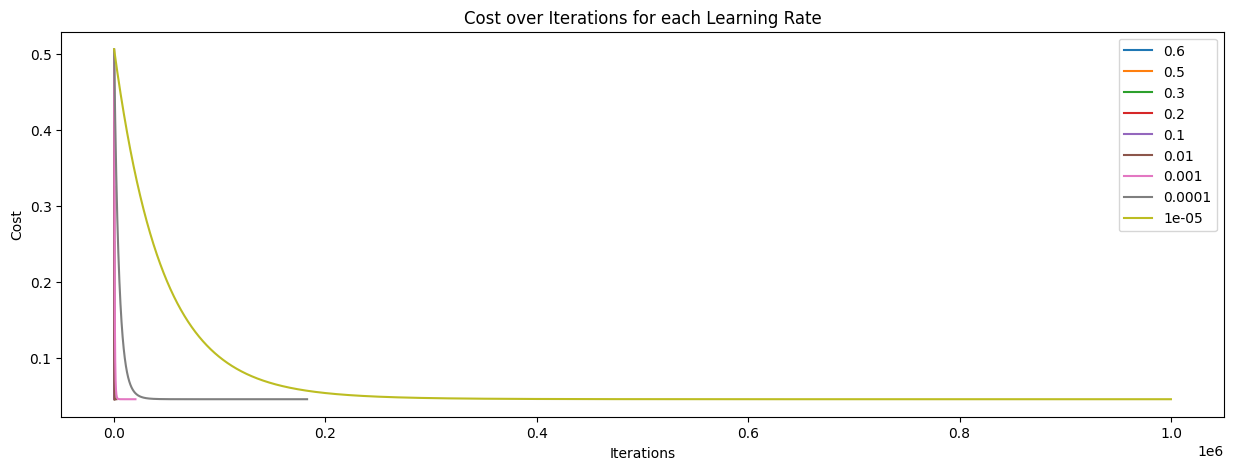

In [51]:
# Plot the cost over iterations for each learning rate (in the same plot)
plt.figure(figsize=(15, 5))
for alpha in learning_rates:
    plt.plot(cost_history_dict[alpha], label=alpha)
plt.title('Cost over Iterations for each Learning Rate')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()

From the plot we can see how the lower the learning rate, the higher the number of iterations needed to reach the optimal number of iterations. Also we can observe that the gradient descent of the higher learning rates are steeper than the lower learning rates.

<br> NOTE: The optimal learning rate to use is based purely on the data that we have. The optimal learning rate may be different for different datasets. In our case we cannot say that one learning rate is better than the other, since we have limited the training on a particular threshold so their ending cost and MSE are almost the same.

In [52]:
df_learning_rates = pd.DataFrame({'Learning Rate': list(cost_dict.keys()), 'Cost': list(cost_dict.values()), 'MSE': list(error_dict.values()), 'Optimal Iterations': list(optimal_iterations_dict.values())})
df_learning_rates

,Learning Rate,Cost,MSE,Optimal Iterations
0,0.60000,0.046229,0.092459,35
1,0.50000,0.046229,0.092459,43
2,0.30000,0.046229,0.092459,76
3,0.20000,0.046229,0.092459,116
4,0.10000,0.046229,0.092459,233
5,0.01000,0.046229,0.092459,2204
6,0.00100,0.046229,0.092459,20178
7,0.00010,0.046229,0.092459,182596
8,0.00001,0.046230,0.092459,999999


Relationship between the learning rate and the number of iterations:
As the learning rate increases, the number of iterations needed to reach optimal iteration (based on a certain threshold) decreases. And vice versa.

### QUESTION 6
Compare the results with the results of the sklearn implementation (Ordinary Least Squares).

In [53]:
# Use Oridinary Least Squares from sklearn
from sklearn.linear_model import LinearRegression
ols = LinearRegression()
ols.fit(X_train, y_train).coef_

# Get the r^2 score for the OLS and the gradient descent
r2_OLS = r2_score(y_train, ols.predict(X_train))
r2_GDA = r2_array[-1]

print(f"r^2 score (OLS): {r2_OLS}")
print(f"r^2 score (GDA): {r2_GDA}")

r^2 score (OLS): 0.9087511585908064
r^2 score (GDA): 0.9087511585908064


Using the sklearn implementation, we can see that the r^2 score is 0.9088, which is the same as the r^2 score that we have obtained from our implementation. This means that there is no actual difference between the two implementations. Even if OLS uses least squares to find the optimal weights, while our implementation uses gradient descent to find the optimal weights.